In [50]:
import pandas as pd

In [51]:
import plotly.express as px
import math

In [52]:
df = pd.read_csv('observations.csv')

In [53]:
df

,satellite_name,norad_cat_id,observation_time_utc,observation_time_uncertainty_sec,apparent_magnitude,apparent_magnitude_uncertainty,observer_latitude_deg,observer_longitude_deg,observer_altitude_m,limiting_magnitude,...,sat_dec_deg_satchecker,range_to_sat_km_satchecker,range_rate_sat_km_s_satchecker,ddec_deg_s_satchecker,dra_cosdec_deg_s_satchecker,phase_angle_deg_satchecker,alt_deg_satchecker,az_deg_satchecker,illuminated,international_designator
0,STARLINK-3729,52135,2024-04-06T01:48:35.000Z,0.3,5.90,0.2,36.00,-96.000,201.0,6.0,...,-12.997353,1532.071164,6.324609,-0.129750,0.046261,10.535559,14.336905,118.393897,True,2022-029AZ
1,STARLINK-3723,52138,2024-04-06T01:49:52.000Z,0.3,6.70,0.2,36.00,-96.000,201.0,6.0,...,34.252031,643.615668,2.350126,-0.582193,0.202330,48.082851,55.777765,80.522038,True,2022-029BC
2,STARLINK-31137,58686,2024-04-06T01:51:50.000Z,0.3,5.20,0.2,36.00,-96.000,201.0,6.0,...,8.524921,809.796179,3.628451,0.173734,0.413865,21.421663,34.357218,106.152593,True,2023-211V
3,STARLINK-31144,58682,2024-04-06T01:54:00.000Z,0.3,5.20,0.2,36.00,-96.000,201.0,6.0,...,-6.720174,670.741047,-0.925428,0.271247,0.556386,52.375180,44.816216,158.276279,True,2023-211R
4,STARLINK-3720,52136,2024-04-06T01:55:44.000Z,0.3,7.30,0.2,36.00,-96.000,201.0,6.0,...,18.839904,678.063641,3.741248,-0.487323,0.211507,37.513397,51.193413,105.709173,True,2022-029BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,STARLINK-30130,56697,2023-07-11T19:36:33.000Z,0.3,6.10,0.1,43.65,41.431,2030.0,10.0,...,26.764438,585.211449,-2.361318,0.026909,0.672972,70.364880,62.623196,240.525263,True,2023-067K
2245,STARLINK-30130,56697,2023-07-11T19:36:38.000Z,0.3,5.99,0.1,43.65,41.431,2030.0,10.0,...,26.846742,574.339199,-1.983998,0.005568,0.698013,67.796389,65.026967,235.029992,True,2023-067K
2246,STARLINK-30130,56697,2023-07-11T19:36:41.000Z,0.3,5.89,0.1,43.65,41.431,2030.0,10.0,...,26.842808,568.739762,-1.747799,-0.008344,0.711169,66.229559,66.390752,231.136107,True,2023-067K
2247,STARLINK-30130,56697,2023-07-11T19:36:49.000Z,0.3,5.77,0.1,43.65,41.431,2030.0,10.0,...,26.618204,557.371772,-1.087500,-0.048399,0.737629,62.002158,69.511839,218.122221,True,2023-067K


In [140]:
df2=df.sort_values(by='norad_cat_id').reset_index()

In [141]:
df2['index']=df2.index

In [142]:
df2

,index,satellite_name,norad_cat_id,observation_time_utc,observation_time_uncertainty_sec,apparent_magnitude,apparent_magnitude_uncertainty,observer_latitude_deg,observer_longitude_deg,observer_altitude_m,...,sat_dec_deg_satchecker,range_to_sat_km_satchecker,range_rate_sat_km_s_satchecker,ddec_deg_s_satchecker,dra_cosdec_deg_s_satchecker,phase_angle_deg_satchecker,alt_deg_satchecker,az_deg_satchecker,illuminated,international_designator
0,0,STARLINK-3504,51881,2024-08-01T02:28:50.000Z,0.2,6.5,0.5,36.128,-95.988,201.0,...,25.574883,664.214564,3.196443,-0.531754,0.198028,47.132631,52.920553,94.460894,True,2022-022AF
1,1,STARLINK-3577,51884,2024-08-01T02:34:30.000Z,0.2,5.5,0.5,36.128,-95.988,201.0,...,16.567287,672.286109,3.834121,-0.478561,0.230426,40.756326,51.915492,110.957442,True,2022-022AJ
2,2,STARLINK-3597,51898,2024-08-01T02:56:02.000Z,0.2,8.0,0.5,36.128,-95.988,201.0,...,10.713078,596.216041,1.677877,-0.458669,0.509832,64.520295,64.137522,191.405474,True,2022-022AY
3,3,STARLINK-3661,52129,2024-04-06T02:17:46.000Z,0.3,5.9,0.2,36.000,-96.000,201.0,...,-0.558597,672.953099,3.782391,-0.379029,0.376982,50.680333,51.752153,160.897103,True,2022-029AT
4,4,STARLINK-3711,52131,2024-04-06T02:12:02.000Z,0.3,5.0,0.2,36.000,-96.000,201.0,...,10.324251,609.112649,3.086562,-0.470627,0.411249,52.639086,61.456721,151.275760,True,2022-029AV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,2244,STARLINK-11250,60910,2024-10-10T01:09:09.000Z,0.2,6.0,0.5,36.128,-95.988,201.0,...,40.431658,343.355441,-0.101918,-0.900648,0.852416,71.343044,84.497351,35.981234,True,2024-154H
2245,2245,STARLINK-11273,60913,2024-10-10T00:47:16.000Z,0.2,6.0,0.5,36.128,-95.988,201.0,...,58.045225,492.418005,0.009191,-0.862580,-0.030160,52.733836,42.492762,40.707887,True,2024-154L
2246,2246,STARLINK-11317,61248,2024-10-12T11:41:22.000Z,0.2,3.5,0.5,36.128,-95.988,201.0,...,39.023773,343.332639,-0.136735,0.916190,0.835665,75.001930,84.531897,303.618200,True,2024-175F
2247,2247,STARLINK-11293,61249,2024-10-12T11:34:02.000Z,0.2,4.0,0.5,36.128,-95.988,201.0,...,25.102611,351.312504,-0.152262,0.779334,0.929077,87.300615,76.161723,140.417034,True,2024-175G


In [163]:
#starlink sorting based on Gunther's space page https://space.skyrocket.de/doc_sdat/starlink-v1-0.htm
sid = []
gen = []
for i in df2['satellite_name'].values:
    try:
        sidint = int(i[9:14])
    except:
        sidint = 0
    sid.append(i[9:])
    if sidint > 30000:
        gen.append("v2mini")
    elif (sidint < 30000 and sidint > 11000):
        gen.append("DTC")
    elif (sidint < 7000 and sidint > 3000):
        gen.append("v1.5")
    elif (sidint < 3000 and sidint > 1000):
        gen.append("v1.0") 
    elif (sidint == 1130):
        gen.append("DarkSat")
    elif (sidint < 100 and sidint > 0):
        gen.append("v0.9")       
    else:
        gen.append('unknown')
df2['starlink-id'] = sid
df2['starlink-gen'] = gen

In [164]:
df2

,index,satellite_name,norad_cat_id,observation_time_utc,observation_time_uncertainty_sec,apparent_magnitude,apparent_magnitude_uncertainty,observer_latitude_deg,observer_longitude_deg,observer_altitude_m,...,range_rate_sat_km_s_satchecker,ddec_deg_s_satchecker,dra_cosdec_deg_s_satchecker,phase_angle_deg_satchecker,alt_deg_satchecker,az_deg_satchecker,illuminated,international_designator,starlink-id,starlink-gen
0,0,STARLINK-3504,51881,2024-08-01T02:28:50.000Z,0.2,6.5,0.5,36.128,-95.988,201.0,...,3.196443,-0.531754,0.198028,47.132631,52.920553,94.460894,True,2022-022AF,3504,v1.5
1,1,STARLINK-3577,51884,2024-08-01T02:34:30.000Z,0.2,5.5,0.5,36.128,-95.988,201.0,...,3.834121,-0.478561,0.230426,40.756326,51.915492,110.957442,True,2022-022AJ,3577,v1.5
2,2,STARLINK-3597,51898,2024-08-01T02:56:02.000Z,0.2,8.0,0.5,36.128,-95.988,201.0,...,1.677877,-0.458669,0.509832,64.520295,64.137522,191.405474,True,2022-022AY,3597,v1.5
3,3,STARLINK-3661,52129,2024-04-06T02:17:46.000Z,0.3,5.9,0.2,36.000,-96.000,201.0,...,3.782391,-0.379029,0.376982,50.680333,51.752153,160.897103,True,2022-029AT,3661,v1.5
4,4,STARLINK-3711,52131,2024-04-06T02:12:02.000Z,0.3,5.0,0.2,36.000,-96.000,201.0,...,3.086562,-0.470627,0.411249,52.639086,61.456721,151.275760,True,2022-029AV,3711,v1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,2244,STARLINK-11250,60910,2024-10-10T01:09:09.000Z,0.2,6.0,0.5,36.128,-95.988,201.0,...,-0.101918,-0.900648,0.852416,71.343044,84.497351,35.981234,True,2024-154H,11250,DTC
2245,2245,STARLINK-11273,60913,2024-10-10T00:47:16.000Z,0.2,6.0,0.5,36.128,-95.988,201.0,...,0.009191,-0.862580,-0.030160,52.733836,42.492762,40.707887,True,2024-154L,11273,DTC
2246,2246,STARLINK-11317,61248,2024-10-12T11:41:22.000Z,0.2,3.5,0.5,36.128,-95.988,201.0,...,-0.136735,0.916190,0.835665,75.001930,84.531897,303.618200,True,2024-175F,11317,DTC
2247,2247,STARLINK-11293,61249,2024-10-12T11:34:02.000Z,0.2,4.0,0.5,36.128,-95.988,201.0,...,-0.152262,0.779334,0.929077,87.300615,76.161723,140.417034,True,2024-175G,11293,DTC


In [165]:
grp=df2.groupby('starlink-gen')

In [166]:
grp.groups

{'DTC': [2232, 2233, 2235, 2236, 2237, 2238, 2239, 2242, 2243, 2244, 2245, 2246, 2247], 'unknown': [1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, ...], 'v1.5': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'v2mini': [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,

array([[<Axes: title={'center': 'apparent_magnitude'}>]], dtype=object)

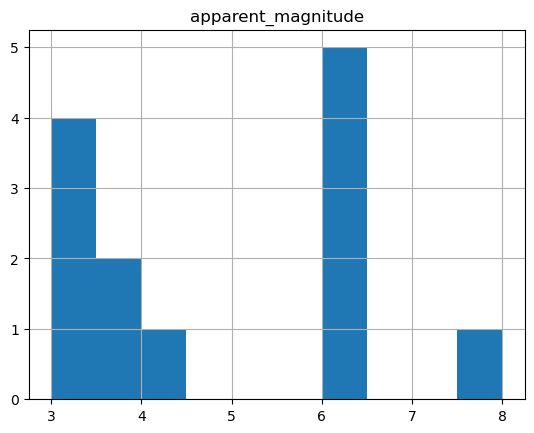

In [169]:
#Number of observations vs mag for DTC
grp.get_group("DTC").hist('apparent_magnitude')

array([[<Axes: title={'center': 'apparent_magnitude'}>]], dtype=object)

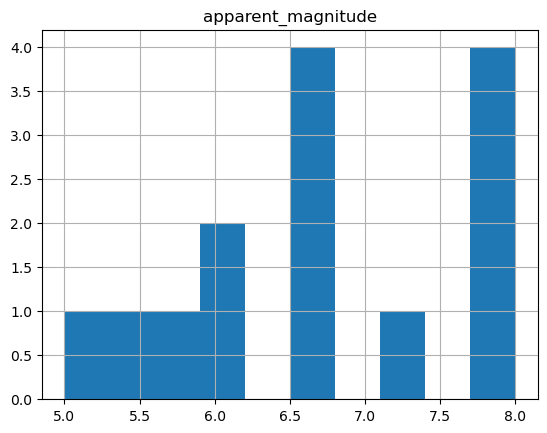

In [174]:
#Number of observations vs mag for v1.5
grp.get_group("v1.5").hist('apparent_magnitude')

array([[<Axes: title={'center': 'apparent_magnitude'}>]], dtype=object)

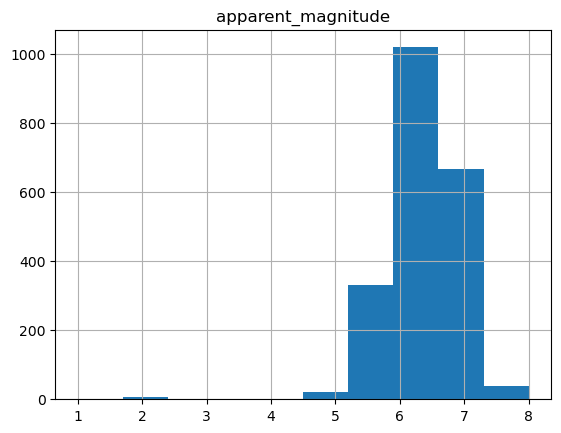

In [173]:
#Number of observations vs mag for v2mini
grp.get_group("v2mini").hist('apparent_magnitude')

In [168]:
grp.get_group("unknown")

,index,satellite_name,norad_cat_id,observation_time_utc,observation_time_uncertainty_sec,apparent_magnitude,apparent_magnitude_uncertainty,observer_latitude_deg,observer_longitude_deg,observer_altitude_m,...,range_rate_sat_km_s_satchecker,ddec_deg_s_satchecker,dra_cosdec_deg_s_satchecker,phase_angle_deg_satchecker,alt_deg_satchecker,az_deg_satchecker,illuminated,international_designator,starlink-id,starlink-gen
1942,1942,STARLINK G,57669,2023-11-10T15:45:21.000Z,0.3,5.82,0.1,43.65,41.431,2030.0,...,2.944198,-0.354218,0.496895,73.628192,52.208335,174.266951,True,NaN,G,unknown
1943,1943,STARLINK G,57669,2023-11-10T15:45:06.000Z,0.3,5.87,0.1,43.65,41.431,2030.0,...,1.873959,-0.380170,0.567746,79.825084,57.627611,188.271848,True,NaN,G,unknown
1944,1944,STARLINK G,57669,2023-11-10T15:45:41.000Z,0.3,6.17,0.1,43.65,41.431,2030.0,...,4.060146,-0.297380,0.401195,67.016193,44.431425,162.451778,True,NaN,G,unknown
1945,1945,STARLINK G,57669,2023-11-10T15:45:16.000Z,0.3,5.59,0.1,43.65,41.431,2030.0,...,2.608903,-0.365383,0.521310,75.582020,54.122598,178.337688,True,NaN,G,unknown
1946,1946,STARLINK G,57669,2023-11-10T15:45:11.000Z,0.3,5.55,0.1,43.65,41.431,2030.0,...,2.251672,-0.374233,0.545106,77.650429,55.947663,182.987159,True,NaN,G,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,STARLINK K,58000,2023-12-04T14:58:10.000Z,0.3,6.25,0.1,43.65,41.431,2030.0,...,1.655133,-0.172473,0.729916,65.797937,73.651221,122.211608,True,NaN,K,unknown
2186,2186,STARLINK K,58000,2023-11-28T14:57:02.000Z,0.3,7.03,0.1,43.65,41.431,2030.0,...,1.821483,0.137792,0.456979,60.552709,34.762371,136.829983,True,NaN,K,unknown
2187,2187,STARLINK K,58000,2023-12-04T14:58:24.000Z,0.3,6.22,0.1,43.65,41.431,2030.0,...,2.752126,-0.224513,0.635764,56.809742,64.512182,110.900189,True,NaN,K,unknown
2188,2188,STARLINK K,58000,2023-12-04T14:58:20.000Z,0.3,6.19,0.1,43.65,41.431,2030.0,...,2.457868,-0.213972,0.664684,59.257600,67.086734,113.133264,True,NaN,K,unknown


In [113]:
df2.columns

Index(['index', 'satellite_name', 'norad_cat_id', 'observation_time_utc',
       'observation_time_uncertainty_sec', 'apparent_magnitude',
       'apparent_magnitude_uncertainty', 'observer_latitude_deg',
       'observer_longitude_deg', 'observer_altitude_m', 'limiting_magnitude',
       'instrument', 'observing_mode', 'observing_filter', 'observer_orcid',
       'satellite_right_ascension_deg', 'satellite_declination_deg',
       'sigma_2_ra', 'sigma_ra_sigma_dec', 'sigma_2_dec',
       'range_to_satellite_km', 'range_to_satellite_uncertainty_km',
       'range_rate_of_satellite_km_per_sec',
       'range_rate_of_satellite_uncertainty_km_per_sec', 'comments',
       'data_archive_link', 'mpc_code', 'sat_ra_deg_satchecker',
       'sat_dec_deg_satchecker', 'range_to_sat_km_satchecker',
       'range_rate_sat_km_s_satchecker', 'ddec_deg_s_satchecker',
       'dra_cosdec_deg_s_satchecker', 'phase_angle_deg_satchecker',
       'alt_deg_satchecker', 'az_deg_satchecker', 'illuminated',
   

In [175]:
df2.to_csv('starlink_observations_gen.csv',index=False)